In [1]:
# Loading Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score,f1_score, make_scorer, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Reading data set

bank_df = pd.read_csv('https://raw.githubusercontent.com/neerajviswajith/CE888/main/Modelling/bank-additional-full.csv', sep = ';')

In [3]:
# Checking for Nan values

print(bank_df.isnull().values.any(),bank_df.isnull().sum().sum())

False 0


In [4]:
# Dropping Default Column

bank_df.drop(columns='duration', inplace=True)

In [5]:
bank_df.head(15)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
#Encoding categorical variables.
bank_df = pd.get_dummies(bank_df, columns=['job','marital','default','education',
                                           'housing','loan','contact','month',
                                           'day_of_week','poutcome'], drop_first=True)


In [7]:
# Label encoding depedent variable
le = preprocessing.LabelEncoder()
bank_df['y'] = le.fit_transform(bank_df['y'])

In [8]:
bank_df.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0


In [9]:
# Splitting Independent and Dependent Variable

X = bank_df.drop(columns='y').copy().values
y = bank_df['y'].copy().values.reshape(len(bank_df['y']),1)

In [10]:
# Dataset Imbalance

cnt = np.unique(y,return_counts=True)
imbalance = cnt[1][1]/cnt[1][0]
print(f'Dataset imbalance: {imbalance}')

Dataset imbalance: 0.126956331399803


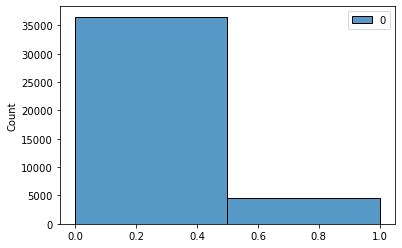

In [11]:
# Plotting Labels

sns_plot = sns.histplot(y, kde=False, bins=2)

In [12]:
# Test Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50, stratify = y)

In [13]:
# 10-Fold Stratified Cross Validation

clf = RandomForestClassifier()
scores = cross_val_score(clf, X_train, y_train.reshape(len(y_train),), cv=10, scoring=make_scorer(accuracy_score))
print("Accuracy: %.2f +/- %.2f" % (scores.mean(), scores.std()))

Accuracy: 0.89 +/- 0.01


In [14]:
# Comparing with dummy Classifier

dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(X_train, y_train.reshape(len(y_train),))
print("Dummy Classifier Accuracy: %.2f" % accuracy_score(y_train.reshape(len(y_train),), dummy_clf.predict(X_train)))

Dummy Classifier Accuracy: 0.80


In [15]:
# GridSearch Cross Validation

RF_params = {'criterion':('gini','entropy'),
             'warm_start':[True,False]}

RF_CV = GridSearchCV(RandomForestClassifier(n_estimators=2000),
                     RF_params,
                     cv=10,
                     scoring=make_scorer(accuracy_score)).fit(X_train,
                                                              y_train.reshape(len(y_train)))
print(RF_CV.best_params_)

{'criterion': 'entropy', 'warm_start': True}


[ 0  7  1  8 33  4  2  6 35  5 20 51 27 30 21 17 49 47 46 48 23  3 36  9
 26 29 15 12 50 25 14 13 31 10 42 18 16 44 11 41 32 34 40 39 37 19 43 45
 22 38 28 24]
Feature ranking:
1. age (0.170321)
2. euribor3m (0.125741)
3. campaign (0.088485)
4. nr.employed (0.049333)
5. housing_yes (0.038929)
6. emp.var.rate (0.033014)
7. pdays (0.026585)
8. cons.conf.idx (0.026419)
9. loan_yes (0.024446)
10. cons.price.idx (0.022809)
11. marital_married (0.021717)
12. poutcome_success (0.018250)
13. education_high.school (0.018068)
14. education_university.degree (0.017738)
15. marital_single (0.017555)
16. job_technician (0.017488)
17. day_of_week_wed (0.017445)
18. day_of_week_thu (0.016955)
19. day_of_week_mon (0.016685)
20. day_of_week_tue (0.016624)
21. default_unknown (0.016592)
22. previous (0.015897)
23. contact_telephone (0.015338)
24. job_blue-collar (0.014939)
25. education_basic.9y (0.013821)
26. education_professional.course (0.012855)
27. job_services (0.012030)
28. job_management (0.011

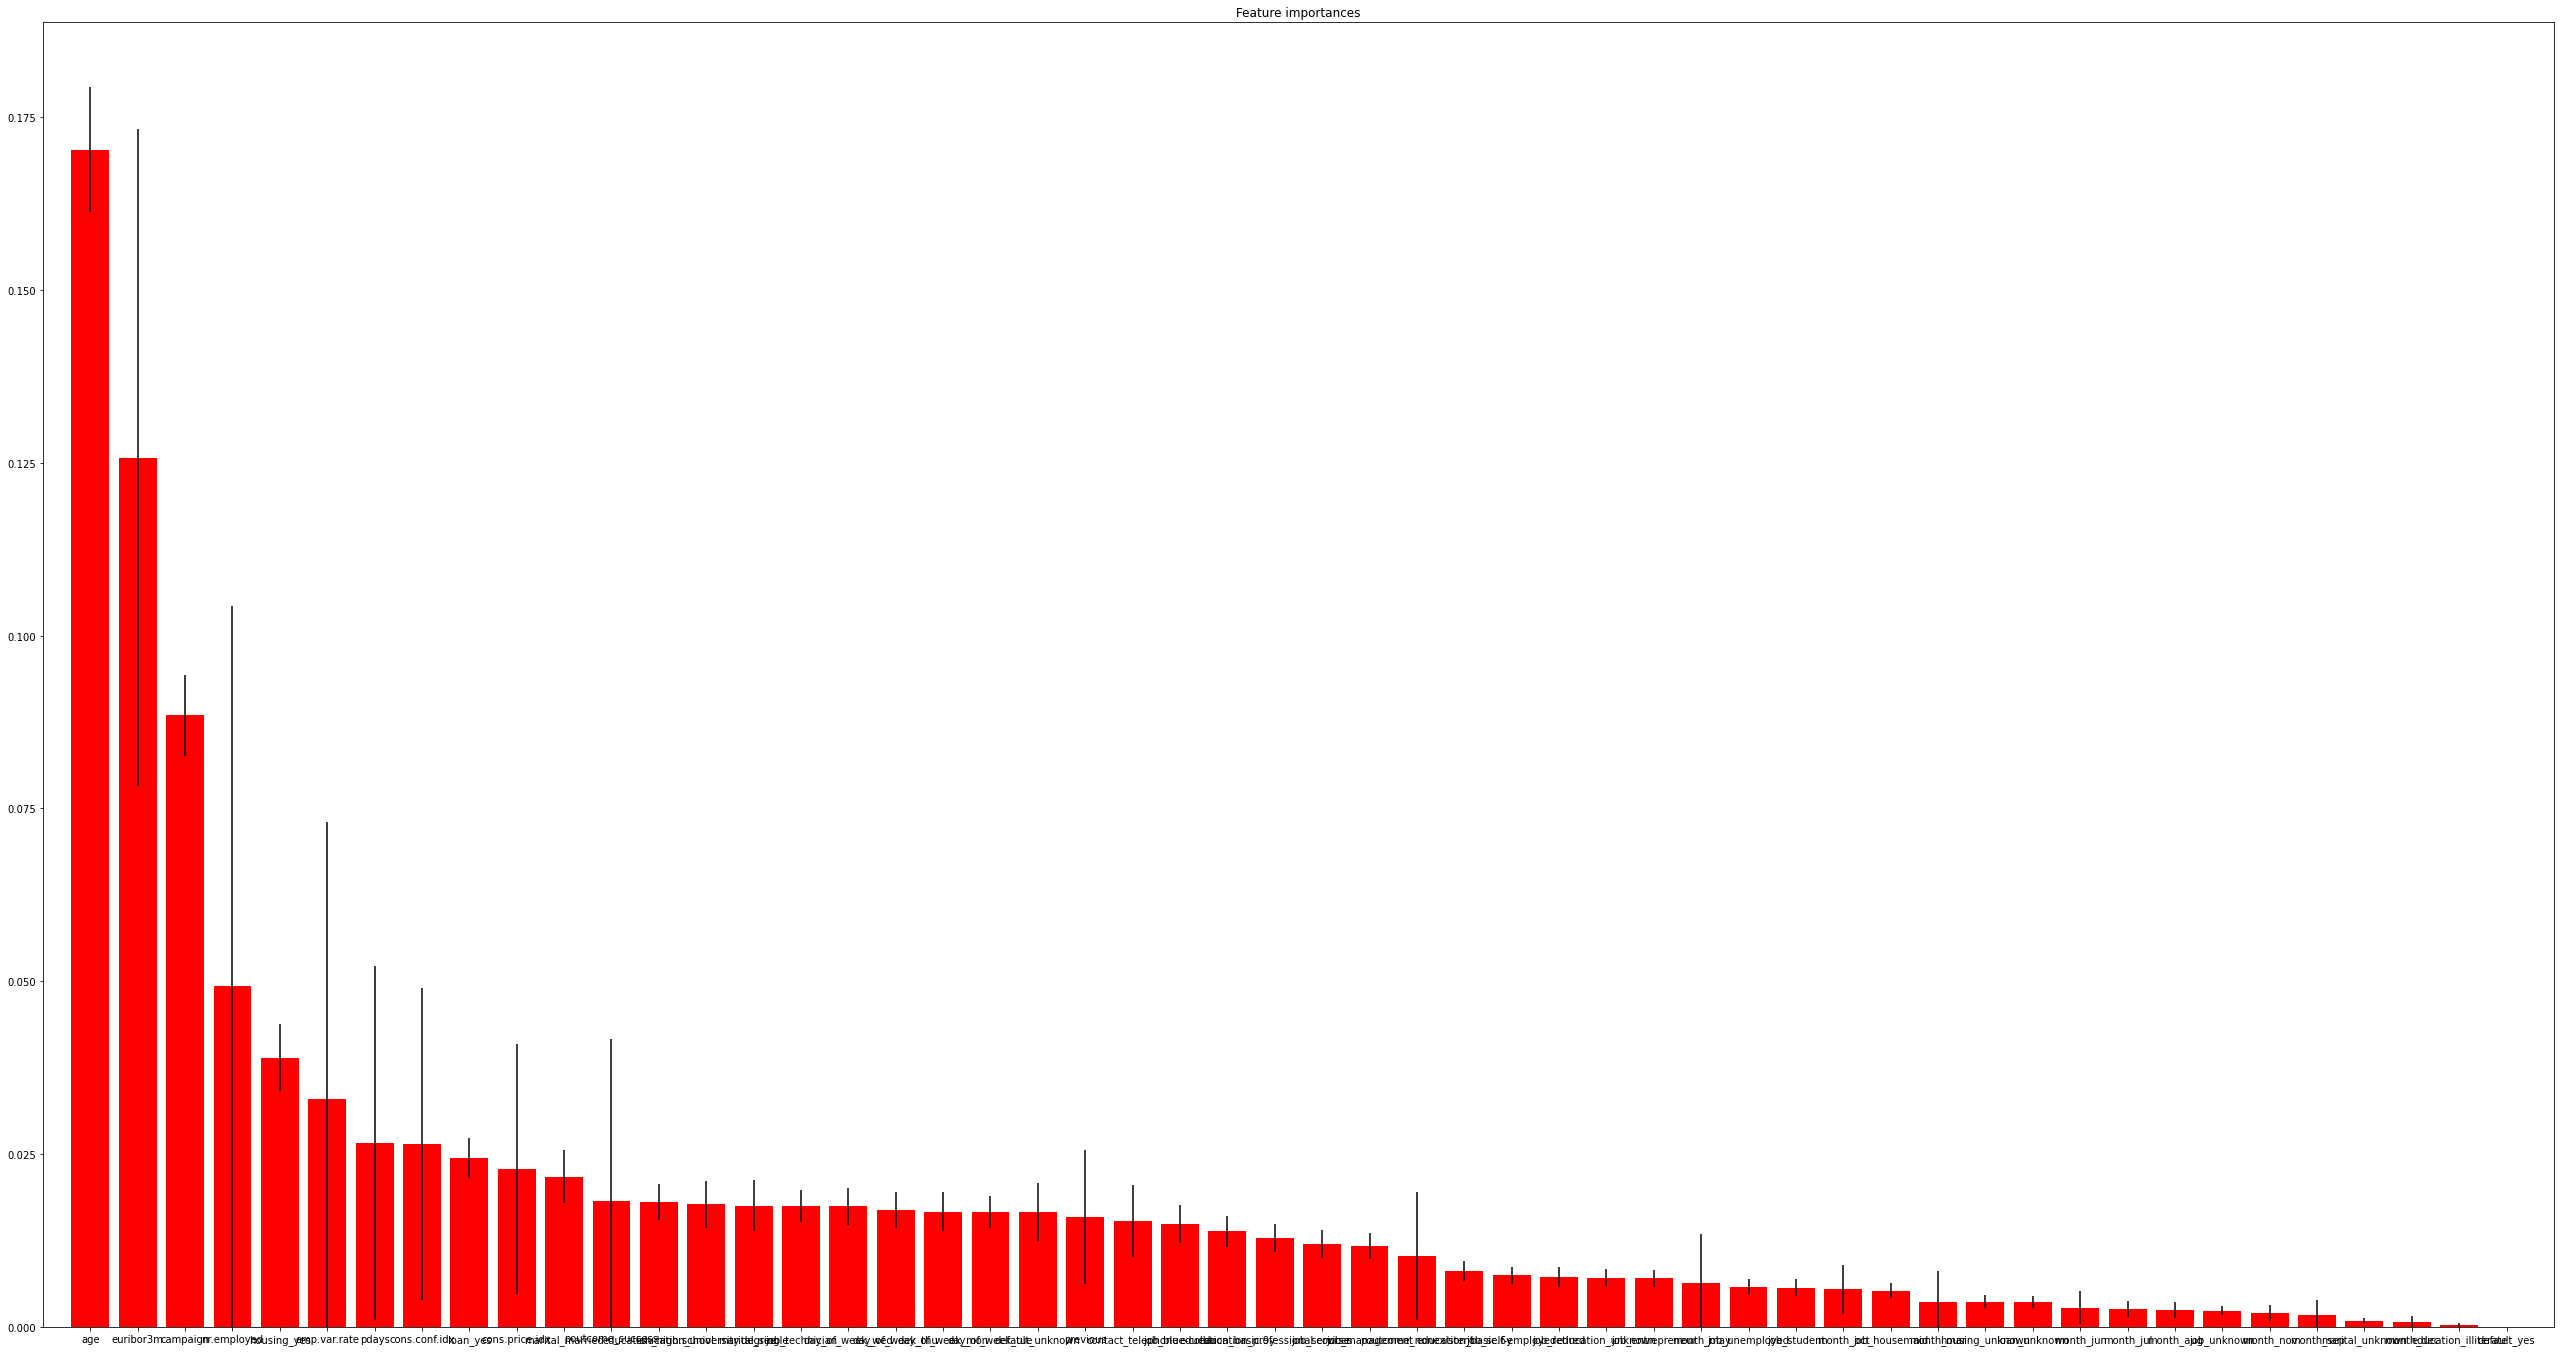

In [16]:
# Finding the best 3 features.

features = bank_df.drop(columns='y').copy().columns
clf = RF_CV.best_estimator_
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), np.array(features)[indices])
plt.xlim([-1, X_train.shape[1]])
plt.ylim([0, None])

fig.set_size_inches(45, 24)

In [17]:
# Comparing with test set.

Opt_Clf = RF_CV.best_estimator_.fit(X_train,y_train.reshape(len(y_train)))
RF_pred = Opt_Clf.predict(X_test)

C:\Users\neera\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:368: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


In [18]:
# Checking Prediction Accuracy
# Confusion Matrix, Classifcation Report & Accuracy Score of LinearSVC

print(confusion_matrix(y_test,RF_pred))
print(classification_report(y_test,RF_pred))
print(f'Accuracy of Model: {round(accuracy_score(y_test,RF_pred),4)*100}%')
print(f'f1-Score of Model: {f1_score(y_test,RF_pred)}')

[[7073  237]
 [ 644  284]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7310
           1       0.55      0.31      0.39       928

    accuracy                           0.89      8238
   macro avg       0.73      0.64      0.67      8238
weighted avg       0.87      0.89      0.88      8238

Accuracy of Model: 89.31%
f1-Score of Model: 0.3919944789510007
